In [1]:
from google.colab import drive
ROOT = "/content/drive"
print(ROOT)
drive.mount(ROOT)

/content/drive
Mounted at /content/drive


In [2]:
from os.path import join  

MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/Successful Ted talks/DATA'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/My Drive/Colab Notebooks/Successful Ted talks/DATA


In [4]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/Successful Ted talks/DATA


In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [36]:
Ted_Ordinal =  pd.read_excel('/content/drive/My Drive/Colab Notebooks/Successful Ted talks/DATA/Final Data set ordered_i.xlsx')

In [37]:
Ted_Ordinal.head()


,number,views,date,speaker,url,Unnamed: 5,Unnamed: 6,sort,duration,topic,reason,relevance,simplicity,humour,storytelling,speaker_p,gender,s_speed,speed,speed_change,speed_change.1,visual,outfit,gesture,movement,expression,grade
0,2,3558174,Dec 19,Valorie Kondos Field,https://www.ted.com/talks/valorie_kondos_field...,NaN,NaN,tedwomen,16,personalgrowth,explanation,5,2,5,both,4,female,3,112,2.0,1,0,formal,2,3,2.0,5
1,3,3242379,Dec 19,Guy Winch,https://www.ted.com/talks/guy_winch_how_to_tur...,NaN,NaN,tedx,12,psychology,solution,5,2,13,personal,4,male,3,100,1.0,0,0,informal,3,1,3.0,5
2,12,12420,Dec 19,Kings Floyd,https://www.ted.com/talks/kings_floyd_the_cost...,NaN,NaN,tedx,10,entertainment,empathy,2,2,4,personal,1,male,4,111,2.0,1,0,informal,2,1,3.0,4
3,13,3125452,Dec 19,Kelsey Leonard,https://www.ted.com/talks/kelsey_leonard_why_l...,NaN,NaN,tedwomen,13,science,explanation,5,1,0,exogenous,3,female,2,76,1.0,0,25,informal,2,1,1.0,4
4,14,1687188,Dec 19,Bright Simons,https://www.ted.com/talks/bright_simons_to_hel...,NaN,NaN,ted,10,health,explanation,3,3,1,personal,4,male,4,139,1.0,0,7,traditional,3,4,3.0,5


In [38]:
Ted_Ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number          193 non-null    int64  
 1   views           193 non-null    int64  
 2   date            193 non-null    object 
 3   speaker         193 non-null    object 
 4   url             193 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   Unnamed: 6      1 non-null      object 
 7   sort            193 non-null    object 
 8   duration        193 non-null    int64  
 9   topic           193 non-null    object 
 10  reason          193 non-null    object 
 11  relevance       193 non-null    int64  
 12  simplicity      193 non-null    int64  
 13  humour          193 non-null    int64  
 14  storytelling    193 non-null    object 
 15  speaker_p       193 non-null    int64  
 16  gender          193 non-null    object 
 17  s_speed         193 non-null    int

In [39]:
Ted_Original = pd.DataFrame(Ted_Ordinal[['relevance', 'simplicity', 's_speed', 'gesture', 'movement', 'expression', 'grade']])

In [5]:
Ted_Re =  pd.read_excel('/content/drive/My Drive/Colab Notebooks/Successful Ted talks/DATA/Final Data set ordered_relaiblity.xlsx')

In [9]:
Ted_Re.head()

,number,views,date,speaker,url,Unnamed: 5,Unnamed: 6,sort,duration,topic,reason,relevance,simplicity,humour,storytelling,speaker_p,gender,s_speed,speed,speed_change,speed_change.1,visual,outfit,gesture,movement,expression,grade,Unnamed: 27
0,2,3558174,Dec 19,Valorie Kondos Field,https://www.ted.com/talks/valorie_kondos_field...,NaN,NaN,tedwomen,16,personalgrowth,explanation,5,3,5,both,4,female,4,112,2.0,1,0,formal,2,2,2.0,4,Ary
1,3,3242379,Dec 19,Guy Winch,https://www.ted.com/talks/guy_winch_how_to_tur...,NaN,NaN,tedx,12,psychology,solution,4,3,13,personal,4,male,2,100,1.0,0,0,informal,3,2,2.0,4,NaN
2,12,12420,Dec 19,Kings Floyd,https://www.ted.com/talks/kings_floyd_the_cost...,NaN,NaN,tedx,10,entertainment,empathy,2,3,4,personal,1,male,3,111,2.0,1,0,informal,2,2,2.0,3,NaN
3,13,3125452,Dec 19,Kelsey Leonard,https://www.ted.com/talks/kelsey_leonard_why_l...,NaN,NaN,tedwomen,13,science,explanation,5,1,0,exogenous,3,female,3,76,1.0,0,25,informal,2,1,2.0,4,NaN
4,14,1687188,Dec 19,Bright Simons,https://www.ted.com/talks/bright_simons_to_hel...,NaN,NaN,ted,10,health,explanation,4,2,1,personal,4,male,4,139,1.0,0,7,traditional,3,5,3.0,4,NaN


In [14]:
Ted_Re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number          193 non-null    int64  
 1   views           193 non-null    int64  
 2   date            193 non-null    object 
 3   speaker         193 non-null    object 
 4   url             193 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   Unnamed: 6      1 non-null      object 
 7   sort            193 non-null    object 
 8   duration        193 non-null    int64  
 9   topic           193 non-null    object 
 10  reason          193 non-null    object 
 11  relevance       193 non-null    int64  
 12  simplicity      193 non-null    int64  
 13  humour          193 non-null    int64  
 14  storytelling    193 non-null    object 
 15  speaker_p       193 non-null    int64  
 16  gender          193 non-null    object 
 17  s_speed         193 non-null    int

In [16]:
Ted_Retest = pd.DataFrame(Ted_Re[['relevance', 'simplicity', 's_speed', 'gesture', 'movement', 'expression', 'grade']])

In [28]:
Ted_Retest.rename(columns = {'relevance': 'relevance_r', 'simplicity': 'simplicity_r', 's_speed':'s_speed_r', 'gesture':'gesture_r', 'movement':'movement_r', 'expression':'expression_r', 'grade':'grade_r'}, inplace=True)
Ted_Retest

,relevance_r,simplicity_r,s_speed_r,gesture_r,movement_r,expression_r,grade_r
0,5,3,4,2,2,2.0,4
1,4,3,2,3,2,2.0,4
2,2,3,3,2,2,2.0,3
3,5,1,3,2,1,2.0,4
4,4,2,4,3,5,3.0,4
...,...,...,...,...,...,...,...
188,5,3,3,2,3,3.0,6
189,4,3,4,2,1,2.0,5
190,5,2,3,3,3,2.0,4
191,5,2,3,2,2,2.0,4


In [40]:
df_Test = Ted_Original.join(Ted_Retest)

In [41]:
corr_reliability = df_Test.corr(method = 'pearson')
display(corr_reliability)

,relevance,simplicity,s_speed,gesture,movement,expression,grade,relevance_r,simplicity_r,s_speed_r,gesture_r,movement_r,expression_r,grade_r
relevance,1.000000,-0.514673,0.028639,-0.110266,-0.085746,-0.072994,0.729259,0.877240,-0.403954,-0.051711,-0.096193,-0.059562,-0.068378,0.567357
simplicity,-0.514673,1.000000,0.272641,-0.058132,0.017887,0.009455,-0.574193,-0.462195,0.765396,0.021105,0.000136,-0.019282,0.037811,-0.480542
s_speed,0.028639,0.272641,1.000000,0.030712,0.116102,0.127866,0.051873,0.049813,0.245640,0.314676,-0.039441,0.102189,0.027284,0.072610
gesture,-0.110266,-0.058132,0.030712,1.000000,0.325519,0.249965,0.012767,-0.118327,-0.005311,0.069394,0.647862,0.347865,0.075506,0.010931
movement,-0.085746,0.017887,0.116102,0.325519,1.000000,0.315002,0.092052,-0.062159,0.022024,0.135029,0.259116,0.799701,0.293578,0.091836
expression,-0.072994,0.009455,0.127866,0.249965,0.315002,1.000000,0.208071,-0.077661,0.083870,0.120065,0.192832,0.244010,0.606181,0.195325
grade,0.729259,-0.574193,0.051873,0.012767,0.092052,0.208071,1.000000,0.623942,-0.419142,0.008817,-0.014996,0.071296,0.089084,0.810784
relevance_r,0.877240,-0.462195,0.049813,-0.118327,-0.062159,-0.077661,0.623942,1.000000,-0.373296,-0.052965,-0.070074,-0.085271,-0.101730,0.517313
simplicity_r,-0.403954,0.765396,0.245640,-0.005311,0.022024,0.083870,-0.419142,-0.373296,1.000000,-0.005868,0.014193,0.018230,0.020086,-0.390651
s_speed_r,-0.051711,0.021105,0.314676,0.069394,0.135029,0.120065,0.008817,-0.052965,-0.005868,1.000000,0.058217,0.117284,0.100579,0.031169


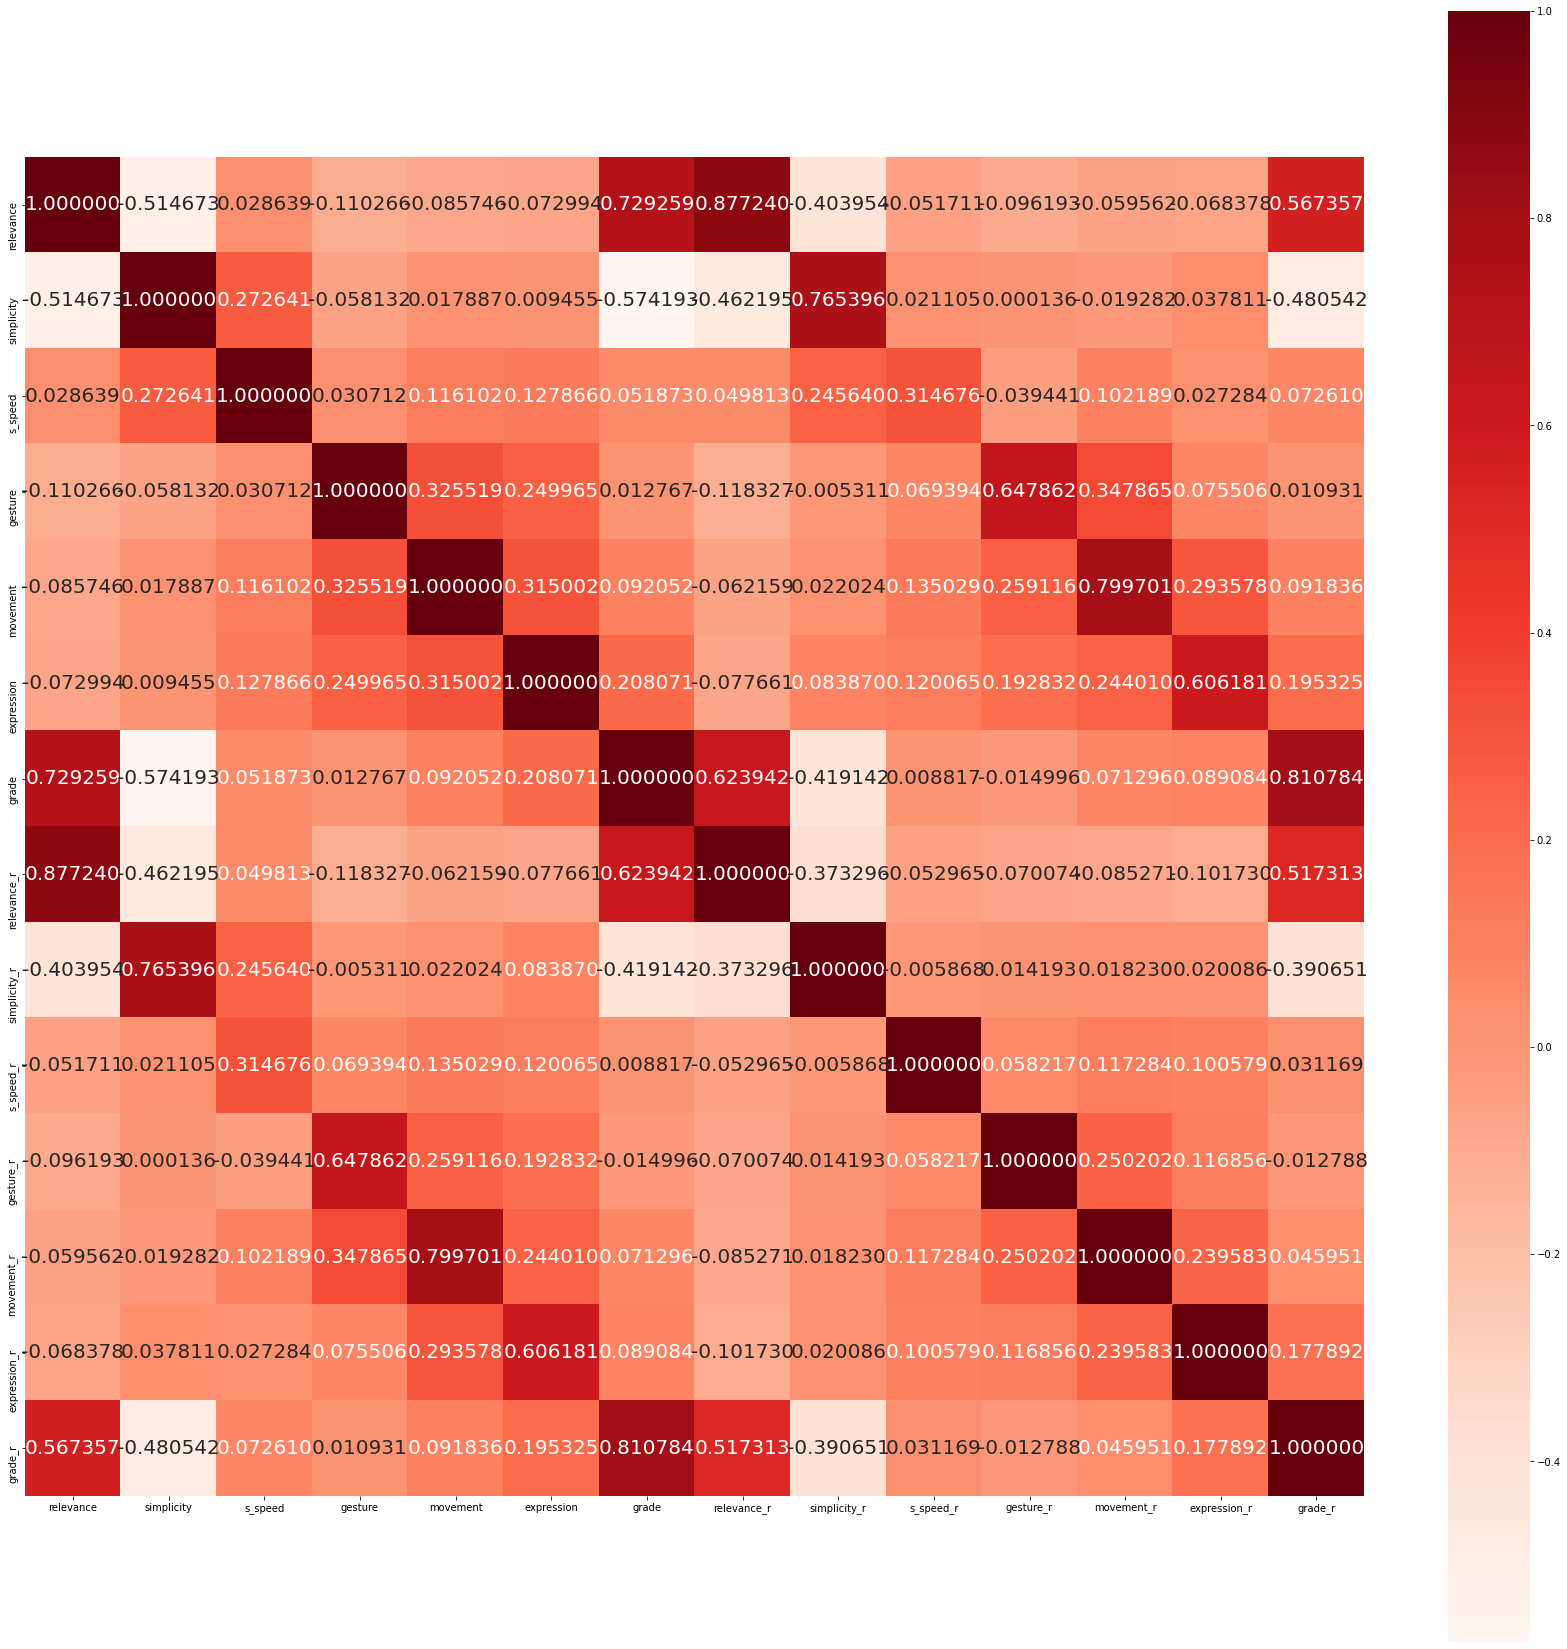

In [48]:
plt.figure(figsize = (30, 30))
TED_heatmap = sns.heatmap(corr_reliability, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '2f', square = True, cmap = 'Reds')